In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# create circles
X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
# make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({'X0':X[:, 0], 'X1':X[:, 1], 'label':y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [6]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

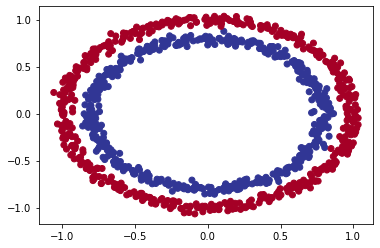

In [7]:
# visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
X[100], y[100]

(array([-0.71086577,  0.27889325]), 1)

In [11]:
# set random seed
tf.random.set_seed(42)

# create the model
model = tf.keras.Sequential(name='CirclesFirst')
model.add(tf.keras.layers.Dense(1))

# compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

# fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


In [12]:
model.fit(X, y, epochs=200, verbose=0)
model.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [13]:
# set random state
tf.random.set_seed(42)

# Build model 1
model_1 = tf.keras.Sequential(name='circles')
model_1.add(tf.keras.layers.Dense(1))
model_1.add(tf.keras.layers.Dense(1))

# compile model 1
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

# fit the model 1
model_1.fit(X, y, epochs=100, verbose=0)

# evaluate model 1
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933313608169556, 0.5]

In [14]:
# set random state
tf.random.set_seed(42)

# build model 2
model_2 = tf.keras.Sequential(name='circles')
model_2.add(tf.keras.layers.Dense(100, activation='relu'))
model_2.add(tf.keras.layers.Dense(1, activation='softmax'))

# compile model 2
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=.1),
    metrics=['accuracy']

)

# fit model 2
model_2.fit(X, y, epochs=100, verbose=0)

# evaluate model 2
model_2.evaluate(X, y)

2022-03-31 22:47:44.656306: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


32/32 [==============================] - 0s 1ms/step - loss: 4.5042e-04 - accuracy: 0.5000


[0.0004504159733187407, 0.5]

In [15]:
# set random state
tf.random.set_seed(42)

# create the model
model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100, input_shape=(None, 1), name='inputShape'),
        tf.keras.layers.Dense(10, name='hiddenLayer1'),
        tf.keras.layers.Dense(1, name='outputLayer')
    ],
    name='circles'
)
# model_3.add(tf.keras.layers.Flatten(input_shape=(1, 1, 1)))
# model_3.add(tf.keras.layers.Dense(100))
# model_3.add(tf.keras.layers.Dense(10, activation='relu'))
# model_3.add(tf.keras.layers.Dense(1, activation='softmax'))

# compile the model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=['accuracy']
)

# fit the model
model_3.fit(X, y, epochs=100, verbose=0)

# evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

In [16]:
model_3.summary()

Model: "circles"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputShape (Dense)          (None, None, 100)         200       
                                                                 
 hiddenLayer1 (Dense)        (None, None, 10)          1010      
                                                                 
 outputLayer (Dense)         (None, None, 1)           11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


In [17]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function has been adapted from two phenomenal resources:
    1. CS231n - https://cs231n.github.io/neural-networks-case-study/
    2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
        )
    # create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # make predictions using the trained model
    y_pred = model.predict(x_in)

    # check for multi-class
    if len(y_pred[0]) > 1:
        print('doing multiclass classification')
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print('doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)

    # plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


doing multiclass classification


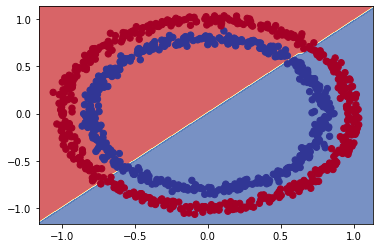

In [18]:
plot_decision_boundary(
    model_3,
    X,
    y
)

In [19]:
tf.random.set_seed(42)

# create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# split into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model_3.fit(
    tf.expand_dims(X_reg_train, axis=-1),
    y_reg_train,
    epochs=100,
    verbose=0
    )

model_3.evaluate(X)

32/32 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [20]:
model_3.summary()

Model: "circles"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputShape (Dense)          (None, None, 100)         200       
                                                                 
 hiddenLayer1 (Dense)        (None, None, 10)          1010      
                                                                 
 outputLayer (Dense)         (None, None, 1)           11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


In [21]:
# set random seed
tf.random.set_seed(42)

# create the model
model_4 = tf.keras.Sequential(name='regCircles')
model_4.add(tf.keras.layers.Dense(100, name='inputLayers'))
model_4.add(tf.keras.layers.Dense(10, name='hiddenLayer'))
model_4.add(tf.keras.layers.Dense(1, name='outputLayer'))

# compile the model in regression
model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# fit the model
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100, verbose=0)

# evaluate the model
model_4.evaluate(tf.expand_dims(X_reg_train, axis=-1), y_reg_train)[1:]
model_4.evaluate(tf.expand_dims(X_reg_test, axis=-1), y_reg_test)[1:]

2/2 [==============================] - 0s 2ms/step - loss: 57.8962 - mae: 57.8962


[57.8962287902832]

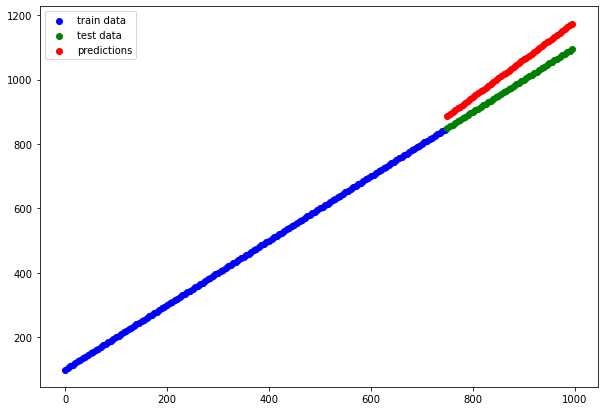

In [22]:
y_reg_preds = model_4.predict(X_reg_test)

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c='b', label="train data")
plt.scatter(X_reg_test, y_reg_test, c='g', label='test data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label='predictions')
plt.legend();

doing multiclass classification


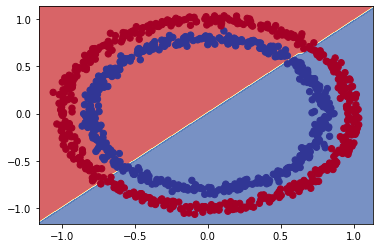

In [23]:
plot_decision_boundary(model_3, X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000
doing binary classification


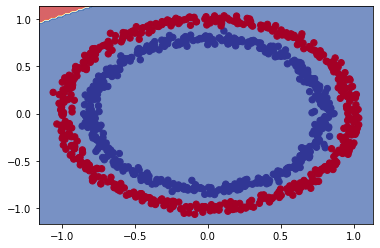

In [24]:
# set the seed
tf.random.set_seed(42)

# build the model
model_5 = tf.keras.Sequential(name='nonLinearActivation')
model_5.add(tf.keras.layers.Dense(1, activation=tf.keras.activations.relu, name='hidden1'))
model_5.add(tf.keras.layers.Dense(1, name='output'))

# compile the model
model_5.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# fit the model
history = model_5.fit(
    X,
    y,
    epochs=100,
    verbose=0
)

# evaluate the model
model_5.evaluate(X, y)

# plot the model
plot_decision_boundary(model_5, X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
doing binary classification


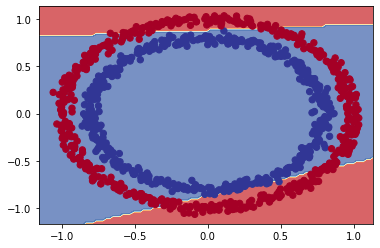

In [25]:
# set random seed
tf.random.set_seed(42)

# build model
model_6 = tf.keras.Sequential(name='2HiddenLayers')
model_6.add(tf.keras.layers.Dense(4, activation='relu', name='hidden1'))
model_6.add(tf.keras.layers.Dense(4, activation='relu', name='hidden2'))
model_6.add(tf.keras.layers.Dense(1, activation=None, name='output'))

# compile the model
model_6.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# fit the model
history = model_6.fit(X, y, epochs=250, verbose=0)

# evaluate the model
model_6.evaluate(X, y)

# plot the model
plot_decision_boundary(model_6, X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0459 - accuracy: 0.9920
doing binary classification


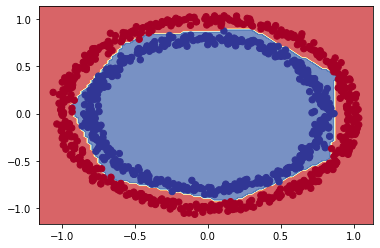

In [26]:
# set random seed
tf.random.set_seed(42)

# build model
model_7 = tf.keras.Sequential(name='2HiddenLayers')
model_7.add(tf.keras.layers.Dense(4, activation='relu', name='hidden1'))
model_7.add(tf.keras.layers.Dense(4, activation='relu', name='hidden2'))
model_7.add(tf.keras.layers.Dense(1, activation='sigmoid', name='output'))

# compile the model
model_7.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# fit the model
history = model_7.fit(X, y, epochs=250, verbose=0)

# evaluate the model
model_7.evaluate(X, y)

# plot the model
plot_decision_boundary(model_7, X, y)

In [27]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

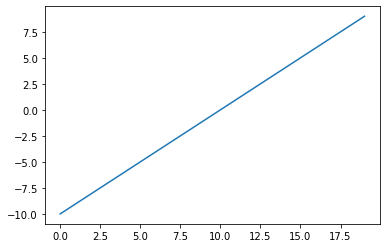

In [28]:
# Visualize our toy tensor
plt.plot(A);

In [29]:
# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

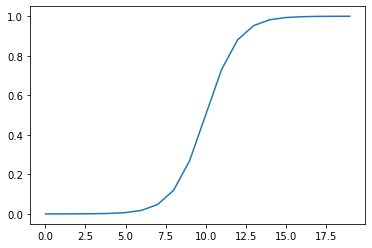

In [30]:
# Plot sigmoid modified tensor
plt.plot(sigmoid(A));

In [31]:
# ReLU - https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu
def relu(x):
  return tf.maximum(0, x)

# Pass toy tensor through ReLU function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

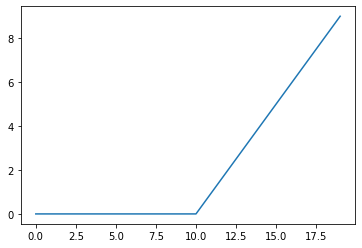

In [32]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

In [33]:
# Linear - https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear (returns input non-modified...)
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [34]:
# Does the linear activation change anything?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [35]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set 

((800, 2), (200, 2))

In [36]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25


/usr/lib/python3.10/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [===========

doing binary classification
doing binary classification


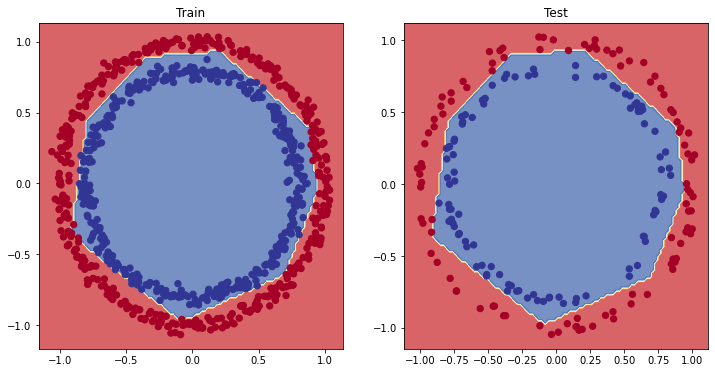

In [37]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

In [38]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468849867582321, 1.0]

In [39]:
# You can access the information in the history variable using the .history attribute
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641257,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Model_8 training curves')

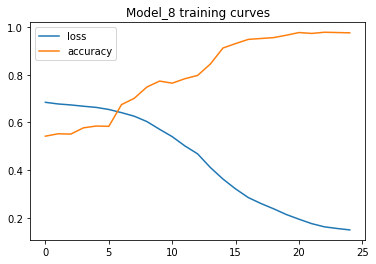

In [40]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

In [41]:
# random seed
tf.random.set_seed(42)

# build the model
model_9 = tf.keras.Sequential(name='CriclesCallbackLr')
model_9.add(tf.keras.layers.Dense(4, activation='relu', name='inputLayer'))
model_9.add(tf.keras.layers.Dense(4, activation='relu', name='hiddenLayer'))
model_9.add(tf.keras.layers.Dense(1, activation='softmax', name='output'))

# compile the model
model_9.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

# set the callback function
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history = model_9.fit(
    X_train,
    y_train,
    epochs=100,
    callbacks=[lr_scheduler],
    verbose=0
)

# Evaluate the model
model_9.evaluate(X_test, y_test)


# Plot the decision boundaries for the training and test sets
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.title("Train")
# plot_decision_boundary(model_9, X=X_train, y=y_train)
# plt.subplot(1, 2, 2)
# plt.title("Test")
# plot_decision_boundary(model_9, X=X_test, y=y_test)
# plt.show()

7/7 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.4950


[0.6934590339660645, 0.4950000047683716]

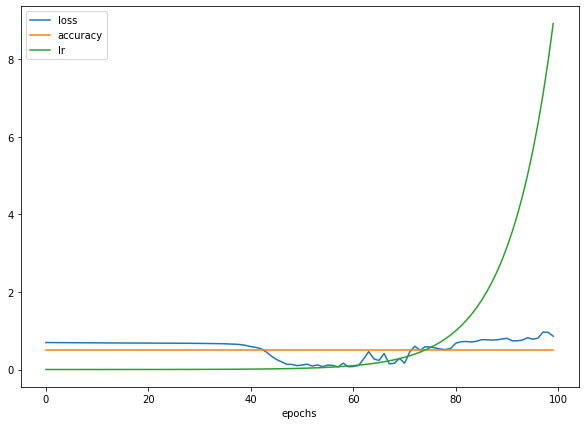

In [42]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel='epochs');

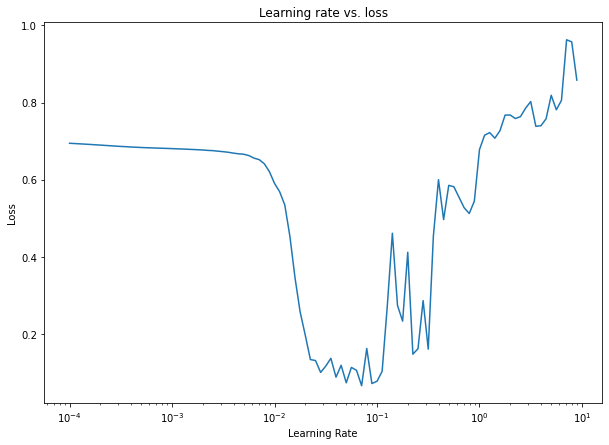

In [43]:
# Plot the learning rate versus the loss
# lrs = 1e-4 * (10 ** (np.arange(100)/20))
# plt.figure(figsize=(10, 7))
# plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
# plt.xlabel("Learning Rate")
# plt.ylabel("Loss")
# plt.title("Learning rate vs. loss");

lrs = 1e-4 * (10** (np.arange(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning rate vs. loss');

In [44]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [45]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20


/usr/lib/python3.10/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [===========

In [46]:
# Evaluate model on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740181356668472, 0.9900000095367432]

doing binary classification
doing binary classification


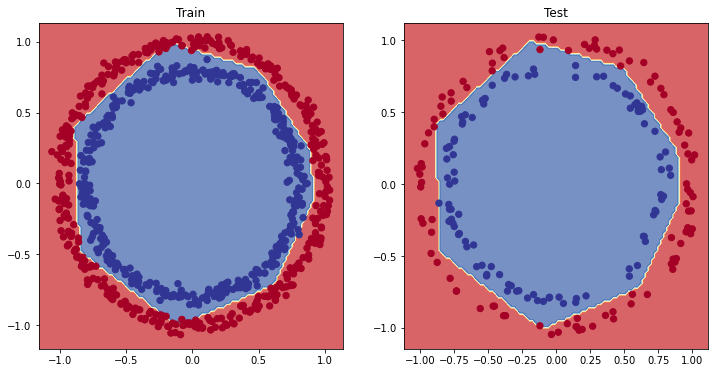

In [47]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

In [48]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 1ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on test set: 0.05740181356668472
Model accuracy on test set: 99.00%


In [49]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
# confusion_matrix(y_test, y_preds)

In [50]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [51]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

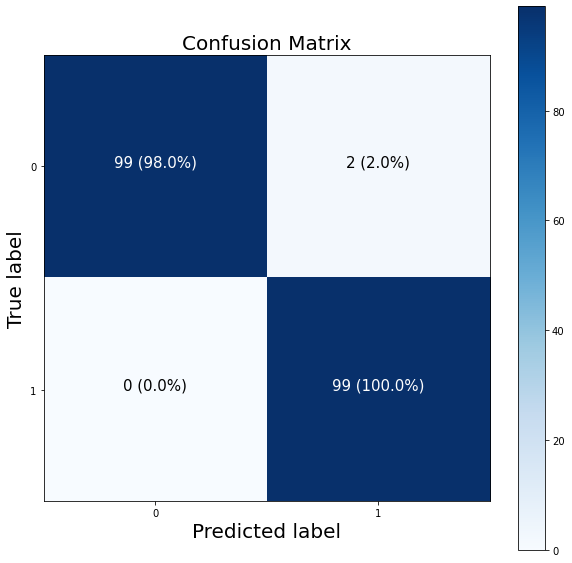

In [52]:
import itertools

# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [53]:
# What does itertools.product do? Combines two things into each combination
import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  print(i, j)

0 0
0 1
1 0
1 1


In [54]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [55]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [56]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [57]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

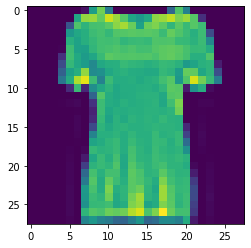

In [58]:
import matplotlib.pyplot as plt
plt.imshow(train_data[10]);

In [59]:
train_labels[10]

0

In [60]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

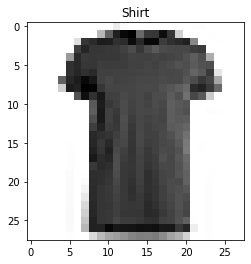

In [61]:
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[18]]);

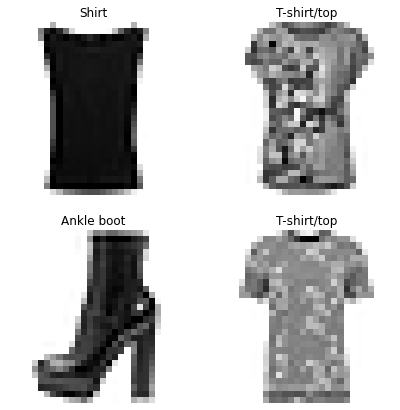

In [62]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [63]:
# set random seed
tf.random.set_seed(42)

# Build the model
model_11 = tf.keras.Sequential(name='mnist')
model_11.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_11.add(tf.keras.layers.Dense(4, activation='relu', name='hidden1'))
model_11.add(tf.keras.layers.Dense(4, activation='relu', name='hidden2'))
model_11.add(tf.keras.layers.Dense(10, activation='softmax', name='output'))

# compile the model
model_11.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

# fit the model
non_norm_history = model_11.fit(
    train_data,
    train_labels,
    epochs=10,
    validation_data=(test_data, test_labels),
    verbose=0
)

# evaluate the model
model_11.evaluate(test_data, test_labels)


313/313 [==============================] - 0s 1ms/step - loss: 1.4917 - accuracy: 0.3591


[1.4916890859603882, 0.35910001397132874]

In [64]:
model_11.summary()

Model: "mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 4)                 3140      
                                                                 
 hidden2 (Dense)             (None, 4)                 20        
                                                                 
 output (Dense)              (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [66]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [67]:
# set random seed
tf.random.set_seed(42)

# build the model with Flatten input shape and softmax output layer
model_12 = tf.keras.Sequential(name='norm_mnist')
model_12.add(tf.keras.layers.Flatten(input_shape=(28, 28), name='flattenLayer'))
model_12.add(tf.keras.layers.Dense(4, activation='relu', name='hidden1'))
model_12.add(tf.keras.layers.Dense(4, activation='relu', name='hidden2'))
model_12.add(tf.keras.layers.Dense(10, activation='softmax', name='output'))

# compile the model using Sparce categorical crossentropy and adam
model_12.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

# fit the model using validation set
norm_history = model_12.fit(
    train_data,
    train_labels,
    epochs=10,
    validation_data=(test_data, test_labels),
    verbose=0
)

# evaluate model on test data
model_12.evaluate(test_data, test_labels)

# summary
model_12.summary()

313/313 [==============================] - 0s 1ms/step - loss: 0.5658 - accuracy: 0.8014
Model: "norm_mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flattenLayer (Flatten)      (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 4)                 3140      
                                                                 
 hidden2 (Dense)             (None, 4)                 20        
                                                                 
 output (Dense)              (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:title={'center':'normalized data'}>

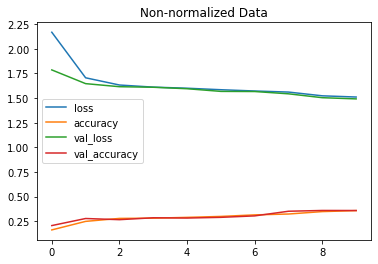

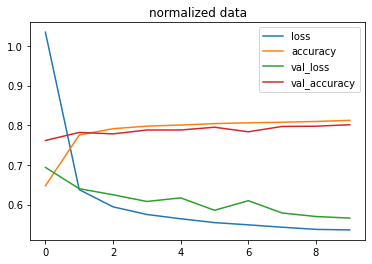

In [68]:
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title='Non-normalized Data')

pd.DataFrame(norm_history.history).plot(title='normalized data')

In [70]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler],
                               verbose=1)

Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

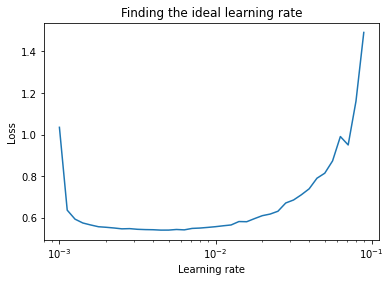

In [71]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [72]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20


/usr/lib/python3.10/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 3s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy: 0.7836
Epo

In [73]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [74]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

array([[8.5630489e-11, 3.5362043e-13, 2.6633861e-05, 4.6356391e-08,
        5.0949919e-05, 9.6119218e-02, 8.1778374e-08, 9.1868699e-02,
        4.0605310e-03, 8.0787385e-01],
       [3.4278810e-06, 1.2899707e-16, 9.5989138e-01, 2.0516315e-07,
        1.5329259e-02, 2.4532806e-13, 2.4142958e-02, 1.1383622e-28,
        6.3271978e-04, 4.4789807e-08],
       [6.1063125e-05, 9.9657673e-01, 4.3867480e-08, 3.3405928e-03,
        1.3249649e-05, 1.4383929e-21, 8.2791157e-06, 7.3238580e-18,
        5.4812027e-08, 4.9226648e-14],
       [7.5031079e-05, 9.9053699e-01, 4.2528700e-07, 9.2231613e-03,
        1.3623247e-04, 1.8276651e-18, 2.6808297e-05, 4.8124838e-14,
        1.4521578e-06, 2.2211928e-11],
       [7.2189875e-02, 1.5495729e-06, 2.5566933e-01, 1.0363119e-02,
        4.3541364e-02, 1.1069571e-13, 6.1692983e-01, 6.7543344e-23,
        1.3049243e-03, 1.2140444e-09]], dtype=float32)

In [75]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [76]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [77]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

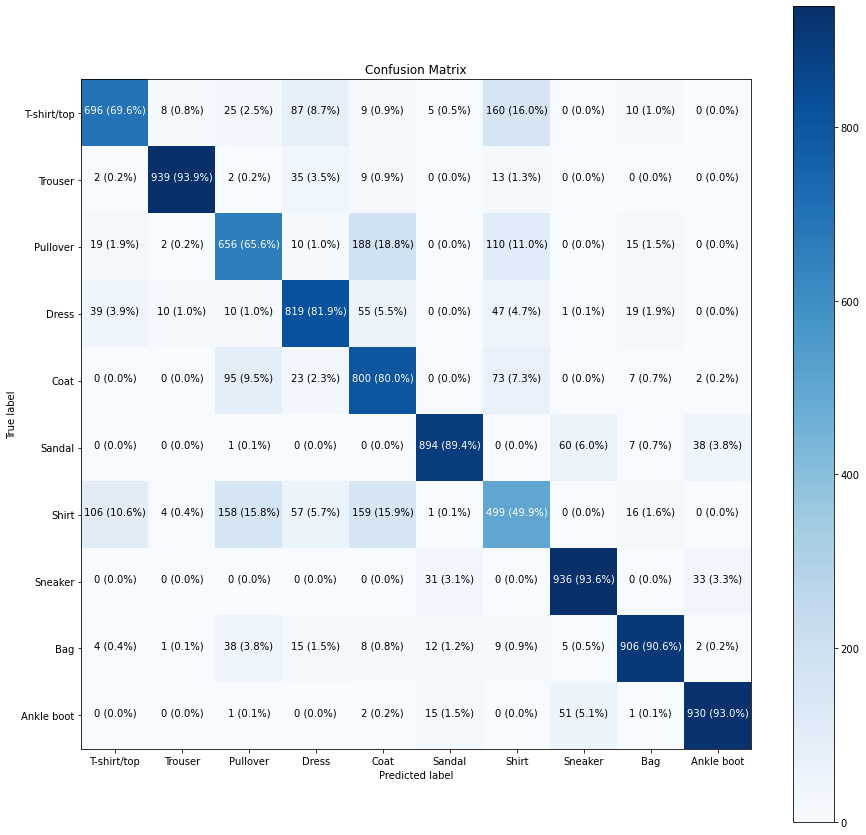

In [78]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [79]:
 import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

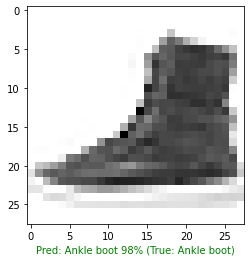

In [80]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

In [81]:
# Find the layers of our most recent model
model_14.layers

In [82]:
# Extract a particular layer
model_14.layers[1]

In [83]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[ 0.71502674, -0.06077104, -0.9976309 , -1.0484313 ],
        [ 0.2773215 , -0.47155368, -0.5291651 ,  0.02329251],
        [ 0.7752432 ,  0.5402758 , -1.1288565 , -0.7426152 ],
        ...,
        [-0.39453426,  0.47628665, -0.22641566,  0.25505948],
        [-0.40515706,  0.61810035,  0.23928419, -0.5038764 ],
        [ 0.23884574,  0.11606924, -0.12131321,  0.04352459]],
       dtype=float32),
 (784, 4))

In [84]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([ 2.4486192e-02, -6.1469292e-04, -2.7230141e-01,  8.1124926e-01],
       dtype=float32),
 (4,))

In [85]:
# Can now calculate the number of paramters in our model
model_14.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 4)                 3140      
                                                                 
 dense_19 (Dense)            (None, 4)                 20        
                                                                 
 dense_20 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


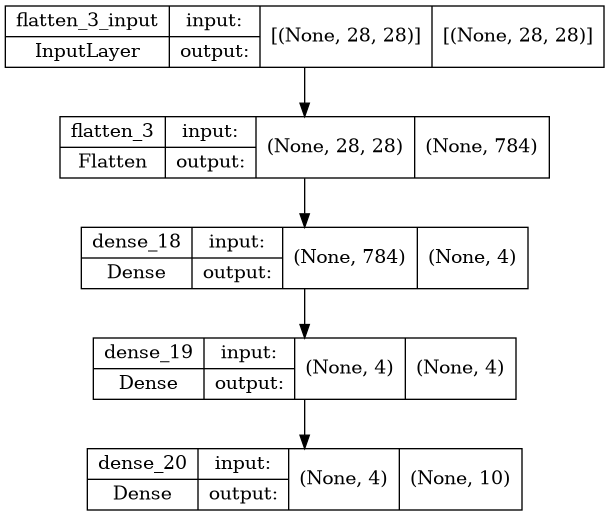

In [86]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)